## 2. Redes Neurais

### Objetivos

  - Conhecer e praticar Redes Neurais Convolucionais
  - Conhecer uma intuição sobre Convolução, Pooling 
  - Praticar a classificação de objeto usando framework TensorFlow
  

## Arquiteturas de Redes Neurais

Nas últimas aulas aprendemos um pouco sobre redes MLP e CNN. Ao longo dos anos algumas arquiteturas tiveram uma adoção maior do mercado e foram mais utilizadas que outras. Partindo dos mesmos conceitos. 

Tomando como base o exemplo da aula anterior (abaixo), implemente os desafios...


<img src="convnet.png">

In [5]:
!pip install tensorflow

  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=d075308a435f786c6c6f6fcdd19547dcee0c58e734296d8f0fbfea5cdb23406a
  Stored in directory: c:\users\logonrmlocal\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

Matplotlib is building the font cache; this may take a moment.


In [7]:
# Importa o dataset Fashion Mnist
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#normaliza os dados para o pixel ficar com valores entre 0 e 
train_images = train_images / 255.0
test_images = test_images / 255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


In [9]:
train_images = train_images.reshape(-1,28,28,1)
train_images.shape
test_images = test_images.reshape(-1,28,28,1)
test_images.shape

(10000, 28, 28, 1)

### Implemetando a arquitetura da rede

In [10]:
from tensorflow.keras import layers

model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28,1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 30)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5070)              0         
                                                                 
 dense (Dense)               (None, 100)               507100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 508,410
Trainable params: 508,410
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs_hist = model.fit(train_images, train_labels, epochs=3)


Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4106 - accuracy: 0.8542
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2781 - accuracy: 0.9012
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2338 - accuracy: 0.9161


### Avaliando os resultados de treinamento

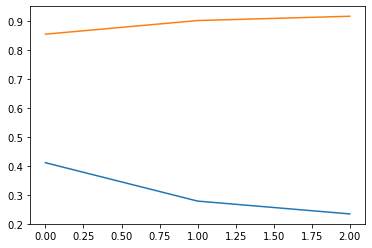

In [12]:
import pandas as pd

history_df = pd.DataFrame(epochs_hist.history)

history_df['loss'].plot();
history_df['accuracy'].plot();


In [13]:
#Validadção
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


1875/1875 - 4s - loss: 0.1937 - accuracy: 0.9299 - 4s/epoch - 2ms/step
313/313 - 1s - loss: 0.2616 - accuracy: 0.9058 - 807ms/epoch - 3ms/step


In [14]:
# Previsões com o modelo treinado

predictions = model.predict(test_images)

In [15]:
#Vericação dos itens preditos

item = 4

print("\nClasse predita foi {} com {:2.0f}%. Classe correta é {}, {}.".format(np.argmax(predictions[item]), 
                                                                 100*np.max(predictions[item]),
                                                                 test_labels[item], 
                                                                 class_names[test_labels[item]]))

a=100*np.max(predictions[item])


Classe predita foi 6 com 99%. Classe correta é 6, Shirt.


In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

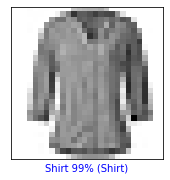

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\tensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.



  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_io_gcs_filesystem-0.24.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached grpcio-1.44.0-cp38-cp38-win_amd64.whl (3.4 MB)
  Using cached libclang-13.0.0-py2.py3-none-win_amd64.whl (13.9 MB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-no

In [17]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(item, predictions, test_labels, test_images)
plt.show()

# Desafio1

Implemente uma rede LeNet-5.

A leNet-5 foi publicada por leCun em 1998. E é composta basicamente por:


<img src="lenet.png">


- Convolutional Layers (CONV);
- Pooling Layers (POOL);
- Fully-Connected Layers (FC).


Um exemplo de aplicação: https://github.com/gary30404/convolutional-neural-network-from-scratch-python


In [38]:
# implemente sua resposta aqui.......

model = keras.Sequential([
    #parâmetros: qt filtros, tamanho da matriz(kernel), função de ativação, tamanho da imagem (Altura, largura, cor (1- preto, 3 - rgb))
    layers.Conv2D(6, (5,5), activation='relu', input_shape=(32, 32, 1)),
    #parâmetro: tamanho do pooling (2x2 divide o tamanho da imagem por 2)
    layers.MaxPooling2D((2,2)),
    #não precisar o parâmetro de tamanho do input, porque já está guardado da primeira convolução
    layers.Conv2D(16, (5,5), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #transformando matriz em vetor
    layers.Flatten(),
    #qt neuronios, função de ativação
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    
    #quantidade de outputs diferentes (classificadores), função de ativação
    keras.layers.Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 400)               0         
                                                                 
 dense_58 (Dense)            (None, 120)             

# Desafio 2 

Comente quais alterações você faria na rede LeNet-5?

Resposta: 

- xxx
- xxx
- xxx
- xxx
- xxx








In [3]:
# Implemente sua solução....






# Desafio 3 

Implemente a rede AlexNet:


<img src="AlexNet-1.png">

paper: https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

In [4]:
### Implemente sua resposta....



